In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/covid19-image-dataset/Covid19-dataset/train',
    target_size=(224, 224),
    batch_size=16,
      
)

Found 251 images belonging to 3 classes.


In [5]:
validation_generator = test_datagen.flow_from_directory(
    '/kaggle/input/covid19-image-dataset/Covid19-dataset/test',
    target_size=(224, 224),
    batch_size=16,
        
)

Found 66 images belonging to 3 classes.


In [6]:
base_model = ResNet50(weights='imagenet', include_top=False,input_shape=(224, 224, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [7]:
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduces spatial dimensions
x = Dense(1024, activation='relu')(x)  
predictions = Dense(3, activation='softmax')(x) 

In [8]:
 
model = Model(inputs=base_model.input, outputs=predictions)

In [9]:
for layer in base_model.layers[:-1]:  # Freeze all layers except the last one
    layer.trainable = False

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

In [11]:
history=model.fit(
    train_generator,
    epochs=20,  
    validation_data=validation_generator
)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733556378.339869     103 service.cc:145] XLA service 0x782204002720 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733556378.339917     103 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733556378.339921     103 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/16 ━━━━━━━━━━━━━━━━━━━━ 4:02 16s/step - accuracy: 0.3750 - loss: 1.1493

I0000 00:00:1733556383.321694     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


16/16 ━━━━━━━━━━━━━━━━━━━━ 31s 978ms/step - accuracy: 0.3474 - loss: 1.5851 - val_accuracy: 0.5455 - val_loss: 1.1585
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 301ms/step - accuracy: 0.5450 - loss: 1.0309 - val_accuracy: 0.6515 - val_loss: 0.8157
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 291ms/step - accuracy: 0.6408 - loss: 0.8182 - val_accuracy: 0.6667 - val_loss: 0.7163
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 275ms/step - accuracy: 0.6862 - loss: 0.7326 - val_accuracy: 0.6515 - val_loss: 0.6867
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 302ms/step - accuracy: 0.6838 - loss: 0.6862 - val_accuracy: 0.6970 - val_loss: 0.5929
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 315ms/step - accuracy: 0.6618 - loss: 0.7706 - val_accuracy: 0.7576 - val_loss: 0.5583
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 326ms/step - accuracy: 0.7181 - loss: 0.7334 - val_accuracy: 0.6515 - val_loss: 0.7397
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 301ms/step - accuracy: 0.6302 - loss: 0.7658 - val_accuracy: 0.6667 - val

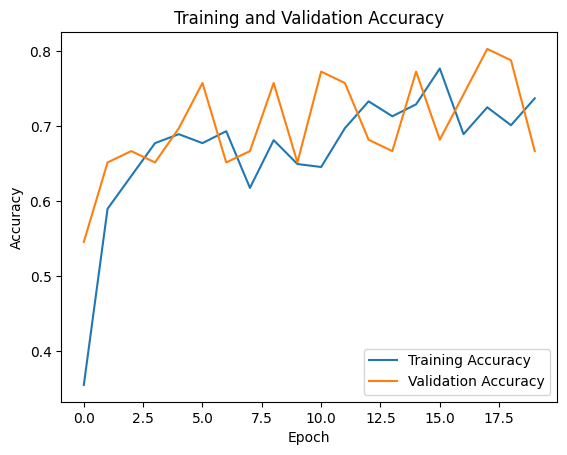

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [14]:
for layer in base_model.layers[-4:]:
    layer.trainable = True

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',  # Replace with appropriate loss for your task
              metrics=['accuracy'])
history=model.fit(
    train_generator,
    epochs=10,  
    validation_data=validation_generator
)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 724ms/step - accuracy: 0.6052 - loss: 1.5363 - val_accuracy: 0.3030 - val_loss: 1.7497
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 298ms/step - accuracy: 0.7448 - loss: 0.6230 - val_accuracy: 0.3788 - val_loss: 2.1286
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 286ms/step - accuracy: 0.7531 - loss: 0.5660 - val_accuracy: 0.5303 - val_loss: 0.8760
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 300ms/step - accuracy: 0.8017 - loss: 0.5447 - val_accuracy: 0.7424 - val_loss: 0.6509
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 268ms/step - accuracy: 0.8291 - loss: 0.4623 - val_accuracy: 0.8182 - val_loss: 0.4944
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 286ms/step - accuracy: 0.8277 - loss: 0.4764 - val_accuracy: 0.6364 - val_loss: 0.8110
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 285ms/step - accuracy: 0.8295 - loss: 0.4913 - val_accuracy: 0.7576 - val_loss: 0.6301
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 313ms/step - accuracy: 0.6964 - loss: 0.6298 - val_accuracy: 0

In [15]:
model.save('covid_classification_model.h5')

In [20]:
from PIL import Image
import numpy as np
image = Image.open("/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal")
image = image.resize((224, 224))  
image = np.array(image) / 255.0  # Normalize pixel values

# Make a prediction
prediction = model.predict(np.expand_dims(image, axis=0))
predicted_class = np.argmax(prediction[0])  # Get the index of the highest probability

 
class_labels = ['Normal', 'COVID-19', 'Pneumonia'] 

 
print("Predicted class:", class_labels[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted class: Normal


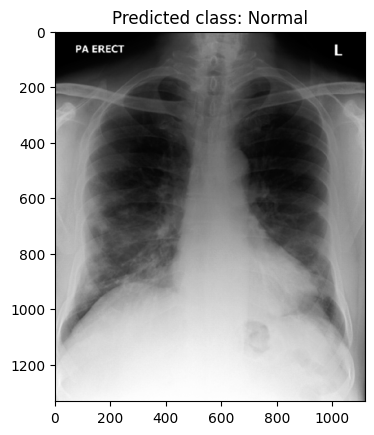

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Normal')
imgplot = plt.imshow(img)
plt.title(f"Predicted class: {class_labels[predicted_class]}")  
plt.show()